In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [467]:
elec_register = pd.read_csv("한국전력공사_지역별 전기차 현황정보_20201008.csv")

In [3]:
elec_register.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준일     3 non-null      object 
 1   부산      3 non-null      int64  
 2   대구      3 non-null      int64  
 3   대전      3 non-null      int64  
 4   광주      3 non-null      int64  
 5   경기      3 non-null      int64  
 6   강원      3 non-null      int64  
 7   경북      3 non-null      int64  
 8   경남      3 non-null      int64  
 9   충북      3 non-null      int64  
 10  충남      3 non-null      int64  
 11  전북      3 non-null      int64  
 12  전남      3 non-null      int64  
 13  세종      3 non-null      int64  
 14  서울      3 non-null      int64  
 15  인천      3 non-null      int64  
 16  울산      3 non-null      int64  
 17  제주      3 non-null      int64  
 18  합계      2 non-null      float64
dtypes: float64(1), int64(17), object(1)
memory usage: 584.0+ bytes


In [4]:
elec_register.head()

,기준일,부산,대구,대전,광주,경기,강원,경북,경남,충북,충남,전북,전남,세종,서울,인천,울산,제주,합계
0,2018-12-31,1567,6605,1334,1447,6383,1377,2001,2107,1199,1127,997,1974,394,9564,1284,847,15549,55756.0
1,2019-12-31,3216,11313,2555,2464,11750,2445,4051,3626,2412,2841,1841,3326,903,14952,2598,1447,18178,89918.0
2,2020-08-31,4320,12468,3338,3046,17197,3091,5400,5003,3319,4252,2906,4576,1076,20997,4204,2142,20699,NaN


# 합계 nan값 수정하기

In [468]:
elec_register.iloc[2,1:18]

부산     4320
대구    12468
대전     3338
광주     3046
경기    17197
강원     3091
경북     5400
경남     5003
충북     3319
충남     4252
전북     2906
전남     4576
세종     1076
서울    20997
인천     4204
울산     2142
제주    20699
Name: 2, dtype: object

In [469]:
elec_register.loc[2,"합계"] = sum(elec_register.iloc[2,1:18])
elec_register.head()

,기준일,부산,대구,대전,광주,경기,강원,경북,경남,충북,충남,전북,전남,세종,서울,인천,울산,제주,합계
0,2018-12-31,1567,6605,1334,1447,6383,1377,2001,2107,1199,1127,997,1974,394,9564,1284,847,15549,55756.0
1,2019-12-31,3216,11313,2555,2464,11750,2445,4051,3626,2412,2841,1841,3326,903,14952,2598,1447,18178,89918.0
2,2020-08-31,4320,12468,3338,3046,17197,3091,5400,5003,3319,4252,2906,4576,1076,20997,4204,2142,20699,118034.0


# 지역별 전기차 등록 비교

In [103]:
elec_register.columns

Index(['기준일', '부산', '대구', '대전', '광주', '경기', '강원', '경북', '경남', '충북', '충남', '전북',
       '전남', '세종', '서울', '인천', '울산', '제주', '합계'],
      dtype='object')

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

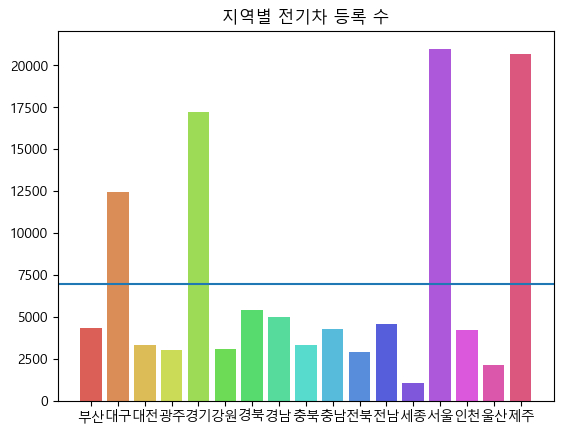

In [395]:
plt.rcParams['font.family'] = 'Malgun Gothic'
x = np.arange(17)
area = list(elec_register.columns)
area = area[1:18]
values = elec_register.iloc[2,1:18]
avg = elec_register.iloc[2,1:18].mean()

colors = sns.color_palette('hls',17)
plt.bar(x,values,color=colors)
plt.xticks(x,area)
plt.axhline(avg, label="평균")
plt.title("지역별 전기차 등록 수")

plt.plot

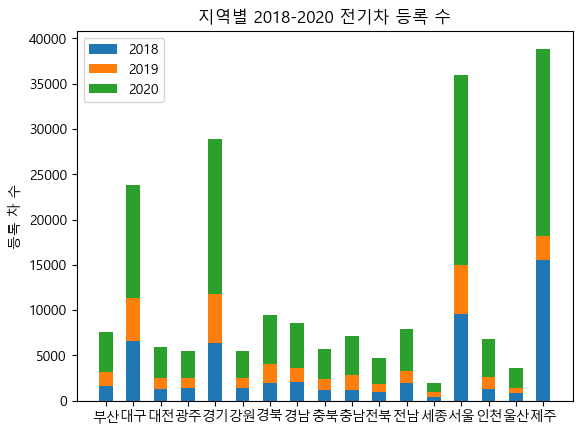

In [313]:
fig, ax = plt.subplots()
ind = np.arange(17)
register2018 = elec_register.iloc[0,1:18]
register2019 = elec_register.iloc[1,1:18]
register2020 = elec_register.iloc[2,1:18]
width = 0.5
p1 = ax.bar(ind, register2018, width, label='2018')
p2 = ax.bar(ind, register2019, width, bottom=register2018, label='2019')
p3 = ax.bar(ind, register2020, width, bottom=register2019, label='2020')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('등록 차 수')
ax.set_title('지역별 2018-2020 전기차 등록 수')
ax.set_xticks(ind)
ax.set_xticklabels(list(elec_register.columns)[1:18])
ax.legend()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

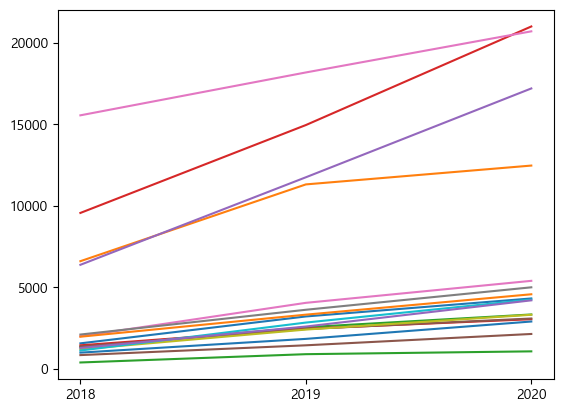

In [355]:
#꺾은선 그래프 있으면 좋겠다... -> 버릴까말까

x_values = ["2018","2019","2020"]
for i in range(1,18):
    plt.plot(x_values, elec_register.iloc[:,i])
plt.show

# 지역별 전기차 충전소 비교

In [379]:
elec_charge = pd.read_csv("전국전기차충전소표준데이터.csv", encoding ="cp949")

In [156]:
elec_charge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   충전소명      6699 non-null   object 
 1   충전소위치상세   6699 non-null   object 
 2   설치시도명     6699 non-null   object 
 3   휴점일       6699 non-null   object 
 4   이용가능시작시각  6699 non-null   object 
 5   이용가능종료시각  6699 non-null   object 
 6   완속충전가능여부  6699 non-null   object 
 7   급속충전가능여부  6699 non-null   object 
 8   급속충전타입구분  4760 non-null   object 
 9   완속충전기대수   5028 non-null   float64
 10  급속충전기대수   4656 non-null   float64
 11  주차료부과여부   6699 non-null   object 
 12  소재지도로명주소  6345 non-null   object 
 13  소재지지번주소   4955 non-null   object 
 14  관리업체명     6255 non-null   object 
 15  관리업체전화번호  4794 non-null   object 
 16  위도        6532 non-null   float64
 17  경도        6535 non-null   float64
 18  데이터기준일자   6699 non-null   object 
 19  제공기관코드    6699 non-null   object 
 20  제공기관명     6699 non-null   obje

In [158]:
elec_charge.describe()

,완속충전기대수,급속충전기대수,위도,경도
count,5028.000000,4656.000000,6532.000000,6535.000000
mean,0.906722,0.846435,36.349110,127.482212
std,1.964842,0.952942,1.251330,0.891093
min,0.000000,0.000000,33.166433,126.019190
25%,0.000000,0.000000,35.562544,126.840912
50%,1.000000,1.000000,36.615257,127.113556
75%,1.000000,1.000000,37.436720,128.262891
max,112.000000,18.000000,38.449157,130.905796


In [157]:
elec_charge.head()

,충전소명,충전소위치상세,설치시도명,휴점일,이용가능시작시각,이용가능종료시각,완속충전가능여부,급속충전가능여부,급속충전타입구분,완속충전기대수,...,주차료부과여부,소재지도로명주소,소재지지번주소,관리업체명,관리업체전화번호,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,평촌목련신동아아파트,"경기도 안양시 동안구 동안로 75 (호계동, 목련신동아아파트) 301동,901동~903동",경기도,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 동안로 75 (호계동, 목련신동아아파트) 301동,901동~903동",-,케이티,1522-0123,37.385373,126.953171,2020-08-11,3830000,경기도 안양시
1,신안메트로칸,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",경기도,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",-,케이티,1522-0123,37.392614,126.954152,2020-08-11,3830000,경기도 안양시
2,신안메트로칸,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",경기도,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",-,케이티,1522-0123,37.392614,126.954152,2020-08-11,3830000,경기도 안양시
3,신안메트로칸,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",경기도,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",-,케이티,1522-0123,37.392614,126.954152,2020-08-11,3830000,경기도 안양시
4,평촌삼성래미안103동,"경기도 안양시 동안구 흥안대로456번길 66 (평촌동, 삼성래미안아파트) 103동 지하",경기도,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 흥안대로456번길 66 (평촌동, 삼성래미안아파트) 103동 지하",-,케이티,1522-0123,37.393263,126.978805,2020-08-11,3830000,경기도 안양시


In [162]:
elec_charge["설치시도명"].value_counts()

경기도        1433
충청남도        793
서울특별시       765
제주특별자치도     501
경상북도        479
경상남도        414
강원도         405
전라남도        376
대구광역시       347
전라북도        339
울산광역시       223
충청북도        210
인천광역시       175
부산광역시       142
대전광역시        73
광주광역시        24
Name: 설치시도명, dtype: int64

In [386]:
elec_charge["설치시도명"].replace({"경기도":"경기",
                                "경상북도":"경북",
                                "서울특별시":"서울",
                                "충청남도":"충남",
                                "전라남도":"전남",
                              "부산광역시":"부산",
                              "제주특별자치도":"제주",
                              "충청북도":"충북",
                              "인천광역시":"인천",
                              "강원도":"강원",
                              "경상남도":"경남",
                              "전라북도":"전북",
                              "울산광역시":"울산",
                              "대구광역시":"대구",
                              "광주광역시":"광주",
                              "대전광역시":"대전",
                              "세종특별자치시":"세종"}, inplace=True)

In [166]:
elec_charge.isnull().sum()

충전소명           0
충전소위치상세        0
설치시도명          0
휴점일            0
이용가능시작시각       0
이용가능종료시각       0
완속충전가능여부       0
급속충전가능여부       0
급속충전타입구분    1939
완속충전기대수     1671
급속충전기대수     2043
주차료부과여부        0
소재지도로명주소     354
소재지지번주소     1744
관리업체명        444
관리업체전화번호    1905
위도           167
경도           164
데이터기준일자        0
제공기관코드         0
제공기관명          0
dtype: int64

# '급속충전기대수'와 '완속충전기대수' 열의 결측치 처리

In [200]:
elec_charge["급속충전기대수"].value_counts()

1.0     2263
0.0     1714
2.0      512
3.0      107
4.0       30
5.0       13
6.0        6
10.0       3
8.0        2
9.0        2
7.0        2
16.0       1
18.0       1
Name: 급속충전기대수, dtype: int64

In [201]:
def fill_null1(x):
    if(pd.notnull(x["급속충전기대수"])):
        return x["급속충전기대수"]
    if x["급속충전가능여부"]=='N':
        return 0
    else:
        return elec_charge["급속충전기대수"].median()
        
def fill_null2(x):
    if(pd.notnull(x["완속충전기대수"])):
        return x["완속충전기대수"]
    if x["완속충전가능여부"]=='N':
        return 0
    else:
        return elec_charge["완속충전기대수"].median()
    
elec_charge["급속충전기대수"] = elec_charge.apply(fill_null1, axis=1)
elec_charge["완속충전기대수"] = elec_charge.apply(fill_null2, axis=1)

In [202]:
elec_charge.isnull().sum()

충전소명           0
충전소위치상세        0
설치시도명          0
휴점일            0
이용가능시작시각       0
이용가능종료시각       0
완속충전가능여부       0
급속충전가능여부       0
급속충전타입구분    1939
완속충전기대수        0
급속충전기대수        0
주차료부과여부        0
소재지도로명주소     354
소재지지번주소     1744
관리업체명        444
관리업체전화번호    1905
위도           167
경도           164
데이터기준일자        0
제공기관코드         0
제공기관명          0
dtype: int64

# 지역별 충전기대수 비교

In [267]:
def count_charge1(x):
    area = elec_charge[elec_charge["설치시도명"]==x]
    return sum(area["급속충전기대수"])
def count_charge2(x):
    area = elec_charge[elec_charge["설치시도명"]==x]
    return sum(area["완속충전기대수"])

areas = list(elec_charge["설치시도명"].drop_duplicates())
charging_machine = pd.DataFrame()
for area in areas:
    charging_machine.loc[area,"급속충전기대수"] = count_charge1(area)
    charging_machine.loc[area,"완속충전기대수"] = count_charge2(area)

In [268]:
charging_machine.loc["세종특별자치시","급속충전기대수"]=0 #위에 지역별 전기차 등록 수와 맞추기 위해  
charging_machine.loc["세종특별자치시","완속충전기대수"]=0

In [336]:
charging_machine.rename(index={"경기도":"경기",
                                "경상북도":"경북",
                                "서울특별시":"서울",
                                "충청남도":"충남",
                                "전라남도":"전남",
                              "부산광역시":"부산",
                              "제주특별자치도":"제주",
                              "충청북도":"충북",
                              "인천광역시":"인천",
                              "강원도":"강원",
                              "경상남도":"경남",
                              "전라북도":"전북",
                              "울산광역시":"울산",
                              "대구광역시":"대구",
                              "광주광역시":"광주",
                              "대전광역시":"대전",
                              "세종특별자치시":"세종"}, inplace=True)

In [337]:
charging_machine

,급속충전기대수,완속충전기대수
경기,751.0,1091.0
경북,443.0,248.0
서울,383.0,772.0
충남,462.0,464.0
전남,302.0,251.0
부산,60.0,112.0
제주,356.0,547.0
충북,143.0,90.0
인천,95.0,158.0
강원,324.0,268.0


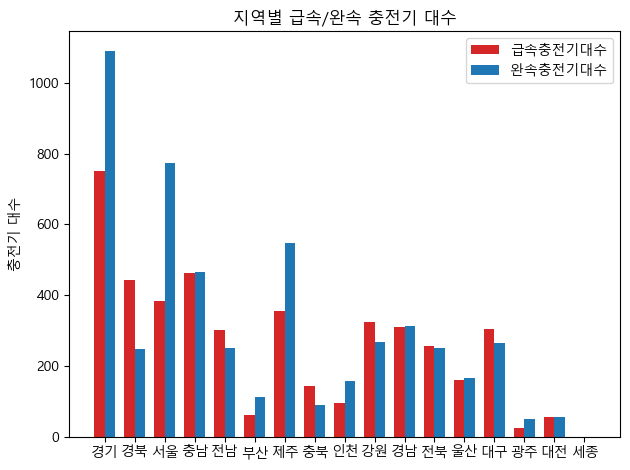

In [399]:
labels = ["경기","경북","서울","충남","전남","부산","제주","충북","인천","강원","경남","전북","울산","대구","광주","대전","세종"]
machine1 = charging_machine["급속충전기대수"]
machine2 = charging_machine["완속충전기대수"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, machine1, width, label='급속충전기대수',color = "tab:red")
rects2 = ax.bar(x + width/2,  machine2, width, label='완속충전기대수',color="tab:blue")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('충전기 대수')
ax.set_title('지역별 급속/완속 충전기 대수')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [440]:
df = pd.DataFrame(charging_machine["급속충전기대수"].sort_values())

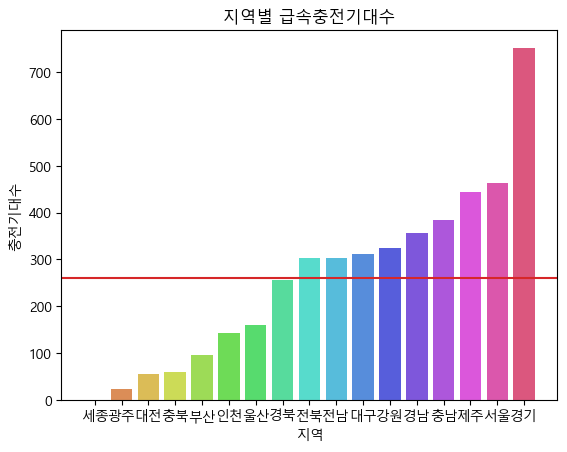

In [442]:
plt.rcParams['font.family'] = 'Malgun Gothic'
x = np.arange(17)
values = list(df["급속충전기대수"])
label = ["세종","광주","대전","충북","부산","인천","울산","경북","전북","전남","대구","강원","경남","충남","제주","서울","경기"]

colors = sns.color_palette('hls',17)
plt.bar(x,values, color = colors)
plt.title("지역별 급속충전기대수")
plt.xticks(x,label)
plt.xlabel("지역")
plt.ylabel("충전기대수")
plt.axhline(charging_machine["급속충전기대수"].mean(), label="평균", color = "tab:red")

plt.show()

In [403]:
df = pd.DataFrame(charging_machine["완속충전기대수"].sort_values())

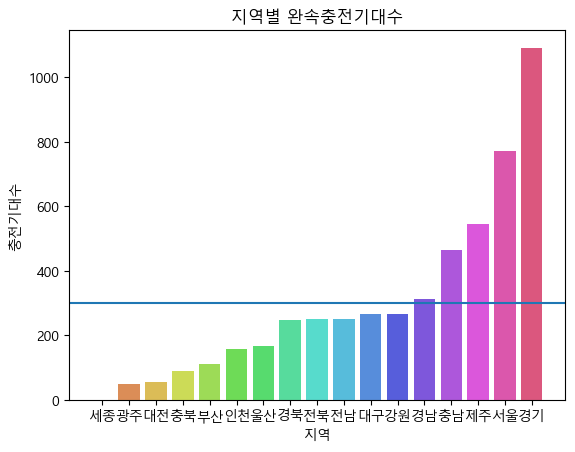

In [404]:
plt.rcParams['font.family'] = 'Malgun Gothic'
x = np.arange(17)
values = list(df["완속충전기대수"])
label = ["세종","광주","대전","충북","부산","인천","울산","경북","전북","전남","대구","강원","경남","충남","제주","서울","경기"]

colors = sns.color_palette('hls',17)
plt.bar(x,values, color = colors)
plt.title("지역별 완속충전기대수")
plt.xticks(x,label)
plt.xlabel("지역")
plt.ylabel("충전기대수")
plt.axhline(charging_machine["완속충전기대수"].mean(), label="평균", color="tab:blue")

plt.show()

# 지역별 전기차 등록 수와 전기차 충전소의 관계

In [470]:
elec_register = elec_register.transpose()
elec_register.drop(["기준일","합계"],axis=0,inplace=True)
elec_register.head()

,0,1,2
부산,1567,3216,4320
대구,6605,11313,12468
대전,1334,2555,3338
광주,1447,2464,3046
경기,6383,11750,17197


In [479]:
elec_car = charging_machine
elec_car["전기차 등록"] = elec_register.iloc[:,2]
elec_car

,급속충전기대수,완속충전기대수,전기차 등록,급속충전기비율,완속충전기비율
경기,751.0,1091.0,17197,0.0436704,0.0634413
경북,443.0,248.0,5400,0.082037,0.0459259
서울,383.0,772.0,20997,0.0182407,0.0367672
충남,462.0,464.0,4252,0.108655,0.109125
전남,302.0,251.0,4576,0.0659965,0.0548514
부산,60.0,112.0,4320,0.0138889,0.0259259
제주,356.0,547.0,20699,0.0171989,0.0264264
충북,143.0,90.0,3319,0.0430853,0.0271166
인천,95.0,158.0,4204,0.0225975,0.0375833
강원,324.0,268.0,3091,0.10482,0.0867033


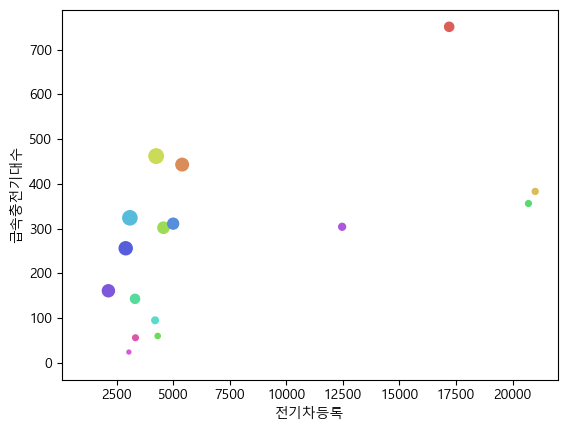

In [451]:
data = []
for i in range(17):
    data.append([elec_car.iloc[i,2],elec_car.iloc[i,0], elec_car.iloc[i,3]*1000])

data
x, y, z= zip(*data)
plt.scatter(x, y,s = z,c=sns.color_palette("hls",17))
plt.ylabel("급속충전기대수")
plt.xlabel("전기차등록")
plt.show()

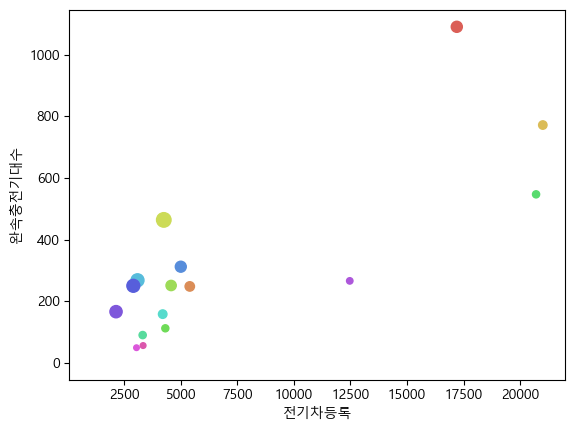

In [452]:
data = []
for i in range(17):
    data.append([elec_car.iloc[i,2],elec_car.iloc[i,1], elec_car.iloc[i,4]*1000])

data
x, y, z= zip(*data)
plt.scatter(x, y,s = z,c=sns.color_palette("hls",17))
plt.ylabel("완속충전기대수")
plt.xlabel("전기차등록")
plt.show()

In [472]:
elec_car["급속충전기비율"] = elec_car["급속충전기대수"]/elec_car["전기차 등록"]
elec_car["완속충전기비율"] = elec_car["완속충전기대수"]/elec_car["전기차 등록"]
elec_car.head()

,급속충전기대수,완속충전기대수,전기차 등록,급속충전기비율,완속충전기비율
경기,751.0,1091.0,17197,0.0436704,0.0634413
경북,443.0,248.0,5400,0.082037,0.0459259
서울,383.0,772.0,20997,0.0182407,0.0367672
충남,462.0,464.0,4252,0.108655,0.109125
전남,302.0,251.0,4576,0.0659965,0.0548514


In [473]:
elec_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 경기 to 세종
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   급속충전기대수  17 non-null     float64
 1   완속충전기대수  17 non-null     float64
 2   전기차 등록   17 non-null     object 
 3   급속충전기비율  17 non-null     object 
 4   완속충전기비율  17 non-null     object 
dtypes: float64(2), object(3)
memory usage: 816.0+ bytes


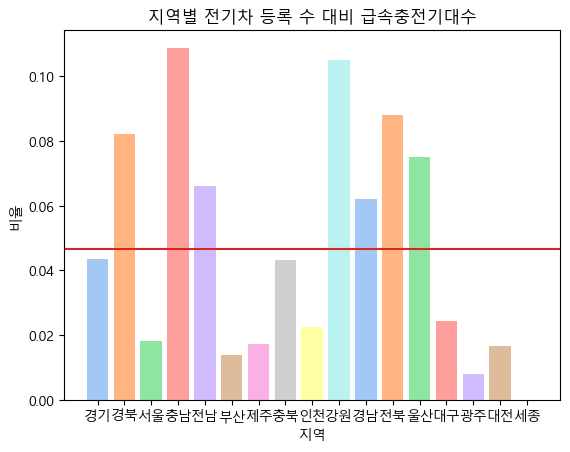

In [477]:
plt.rcParams['font.family'] = 'Malgun Gothic'
x = np.arange(17)
values = elec_car["급속충전기비율"]
label = list(elec_car.index)

colors = sns.color_palette('pastel',17)
plt.bar(x,values, color = colors)
plt.title("지역별 전기차 등록 수 대비 급속충전기대수")
plt.xticks(x,label)
plt.xlabel("지역")
plt.ylabel("비율")
plt.axhline(elec_car["급속충전기비율"].mean(), label="평균", color="tab:red")

plt.show()

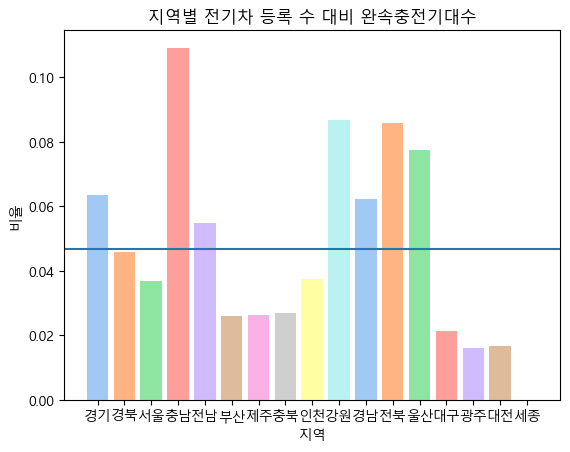

In [478]:
plt.rcParams['font.family'] = 'Malgun Gothic'
x = np.arange(17)
values = elec_car["완속충전기비율"]
label = list(elec_car.index)

colors = sns.color_palette('pastel',17)
plt.bar(x,values, color = colors)
plt.title("지역별 전기차 등록 수 대비 완속충전기대수")
plt.xticks(x,label)
plt.xlabel("지역")
plt.ylabel("비율")
plt.axhline(elec_car["완속충전기비율"].mean(), label="평균", color="tab:blue")

plt.show()

In [349]:
elec_car["급속충전기비율"].sort_values()

세종             0
광주    0.00787919
부산     0.0138889
대전     0.0167765
제주     0.0171989
서울     0.0182407
인천     0.0225975
대구     0.0243824
충북     0.0430853
경기     0.0436704
경남     0.0621627
전남     0.0659965
울산     0.0751634
경북      0.082037
전북     0.0880936
강원       0.10482
충남      0.108655
Name: 급속충전기비율, dtype: object

In [356]:
elec_car["완속충전기비율"].sort_values()

세종            0
광주    0.0160867
대전    0.0167765
대구    0.0213346
부산    0.0259259
제주    0.0264264
충북    0.0271166
서울    0.0367672
인천    0.0375833
경북    0.0459259
전남    0.0548514
경남    0.0623626
경기    0.0634413
울산    0.0774977
전북    0.0860289
강원    0.0867033
충남     0.109125
Name: 완속충전기비율, dtype: object

In [ ]:
# 지도 그래프 가지고 싶습니당....
# 없으면 평균선 있는 막대그래프라도 그리자

# 전기차 충전소의 충전방식에 따른 전기차 모델 비교

In [420]:
elec_charge.head()

,충전소명,충전소위치상세,설치시도명,휴점일,이용가능시작시각,이용가능종료시각,완속충전가능여부,급속충전가능여부,충전타입구분,완속충전기대수,...,주차료부과여부,소재지도로명주소,소재지지번주소,관리업체명,관리업체전화번호,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,평촌목련신동아아파트,"경기도 안양시 동안구 동안로 75 (호계동, 목련신동아아파트) 301동,901동~903동",경기,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 동안로 75 (호계동, 목련신동아아파트) 301동,901동~903동",-,케이티,1522-0123,37.385373,126.953171,2020-08-11,3830000,경기도 안양시
1,신안메트로칸,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",경기,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",-,케이티,1522-0123,37.392614,126.954152,2020-08-11,3830000,경기도 안양시
2,신안메트로칸,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",경기,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",-,케이티,1522-0123,37.392614,126.954152,2020-08-11,3830000,경기도 안양시
3,신안메트로칸,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",경기,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",-,케이티,1522-0123,37.392614,126.954152,2020-08-11,3830000,경기도 안양시
4,평촌삼성래미안103동,"경기도 안양시 동안구 흥안대로456번길 66 (평촌동, 삼성래미안아파트) 103동 지하",경기,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 흥안대로456번길 66 (평촌동, 삼성래미안아파트) 103동 지하",-,케이티,1522-0123,37.393263,126.978805,2020-08-11,3830000,경기도 안양시


In [372]:
elec_charge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   충전소명      6699 non-null   object 
 1   충전소위치상세   6699 non-null   object 
 2   설치시도명     6699 non-null   object 
 3   휴점일       6699 non-null   object 
 4   이용가능시작시각  6699 non-null   object 
 5   이용가능종료시각  6699 non-null   object 
 6   완속충전가능여부  6699 non-null   object 
 7   급속충전가능여부  6699 non-null   object 
 8   급속충전타입구분  4760 non-null   object 
 9   완속충전기대수   6699 non-null   float64
 10  급속충전기대수   6699 non-null   float64
 11  주차료부과여부   6699 non-null   object 
 12  소재지도로명주소  6345 non-null   object 
 13  소재지지번주소   4955 non-null   object 
 14  관리업체명     6255 non-null   object 
 15  관리업체전화번호  4794 non-null   object 
 16  위도        6532 non-null   float64
 17  경도        6535 non-null   float64
 18  데이터기준일자   6699 non-null   object 
 19  제공기관코드    6699 non-null   object 
 20  제공기관명     6699 non-null   obje

In [360]:
elec_charge["급속충전타입구분"].value_counts()

DC차데모+AC3상+DC콤보         1579
AC완속                    1531
DC콤보                     510
AC3상+DC차데모 +DC콤보         205
AC3상+DC차데모+DC콤보          121
                        ... 
초소형전기차 콘센트                 1
AC6상+DC차데모+DC콤보            1
DC차데모,AC3상,DC콤보/DC콤보       1
해당없음                       1
DC차데모,AC6상,DC콤보            1
Name: 급속충전타입구분, Length: 103, dtype: int64

In [380]:
elec_charge["급속충전타입구분"].fillna("해당없음",inplace=True)
elec_charge.rename(columns={"급속충전타입구분":"충전타입구분"}, inplace=True)

In [362]:
car_model = pd.read_csv("한국전력공사_전기차량 모델별 충전타입 및 연비 등 정보_20201008.csv", encoding="cp949")
car_model.head()

,모델명,급속충전방식,완속충전방식,배터리용량,제조사,출시일
0,VOLVO S90 T8,미정의,미정의,NaN,VOLVO,NaN
1,BMW X3 xDRIVE30e,미정의,미정의,NaN,BMW,NaN
2,BMW 530e PHEV,미정의,미정의,10.8,BMW,NaN
3,벤츠 EQC400,미정의,미정의,80.0,벤츠,NaN
4,벤테이가 PHEV,미정의,미정의,17.3,벤틀리,NaN


In [405]:
car_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   모델명     27 non-null     object 
 1   급속충전방식  27 non-null     object 
 2   완속충전방식  27 non-null     object 
 3   배터리용량   16 non-null     float64
 4   제조사     27 non-null     object 
 5   출시일     11 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.4+ KB


In [369]:
car_model["급속충전방식"].value_counts()

미정의          16
DC콤보(급속)      6
DC차데모(급속)     4
AC3상(급속)      1
Name: 급속충전방식, dtype: int64

In [387]:
fast_charge = {"DC콤보":0,"DC차데모":0,"AC3상":0}
for charge in fast_charge.keys():
    fast_charge[charge]=sum(elec_charge["충전타입구분"].apply(lambda x: int(charge in x)))
fast_charge

{'DC콤보': 2838, 'DC차데모': 2365, 'AC3상': 2220}

In [406]:
for i in range(27):
    for charge in fast_charge.keys():
        if(charge in car_model.loc[i,"급속충전방식"]):
            car_model.loc[i,"충전소개수"] = fast_charge[charge]
car_model

,모델명,급속충전방식,완속충전방식,배터리용량,제조사,출시일,충전소개수
0,VOLVO S90 T8,미정의,미정의,NaN,VOLVO,NaN,NaN
1,BMW X3 xDRIVE30e,미정의,미정의,NaN,BMW,NaN,NaN
2,BMW 530e PHEV,미정의,미정의,10.8,BMW,NaN,NaN
3,벤츠 EQC400,미정의,미정의,80.0,벤츠,NaN,NaN
4,벤테이가 PHEV,미정의,미정의,17.3,벤틀리,NaN,NaN
5,E6,미정의,미정의,60.0,조이롱코리아,NaN,NaN
6,BMW 7 PHEV,미정의,AC완속(5핀),NaN,BMW,NaN,NaN
7,GLC 350e PHEV,미정의,AC완속(5핀),NaN,벤츠,NaN,NaN
8,i3,DC콤보(급속),AC완속(5핀),21.3,BMW,2014-04,2838.0
9,SM3 ZE,AC3상(급속),AC완속(7핀),26.6,르노삼성,2018-07,2220.0


In [424]:
elec_charge["AC완속"==elec_charge["충전타입구분"]] #포함한 거랑 그냥 같은 거랑 개수 같음 -> 급속충전, 완속충전 중복없음

,충전소명,충전소위치상세,설치시도명,휴점일,이용가능시작시각,이용가능종료시각,완속충전가능여부,급속충전가능여부,충전타입구분,완속충전기대수,...,주차료부과여부,소재지도로명주소,소재지지번주소,관리업체명,관리업체전화번호,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,평촌목련신동아아파트,"경기도 안양시 동안구 동안로 75 (호계동, 목련신동아아파트) 301동,901동~903동",경기,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 동안로 75 (호계동, 목련신동아아파트) 301동,901동~903동",-,케이티,1522-0123,37.385373,126.953171,2020-08-11,3830000,경기도 안양시
1,신안메트로칸,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",경기,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",-,케이티,1522-0123,37.392614,126.954152,2020-08-11,3830000,경기도 안양시
2,신안메트로칸,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",경기,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",-,케이티,1522-0123,37.392614,126.954152,2020-08-11,3830000,경기도 안양시
3,신안메트로칸,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",경기,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",-,케이티,1522-0123,37.392614,126.954152,2020-08-11,3830000,경기도 안양시
4,평촌삼성래미안103동,"경기도 안양시 동안구 흥안대로456번길 66 (평촌동, 삼성래미안아파트) 103동 지하",경기,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 흥안대로456번길 66 (평촌동, 삼성래미안아파트) 103동 지하",-,케이티,1522-0123,37.393263,126.978805,2020-08-11,3830000,경기도 안양시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6459,주생면사무소,전라북도 남원시 주생면 제천리 9-4 (주생면사무소),전북,연중무휴,00:00,23:59,Y,N,AC완속,1.0,...,N,전라북도 남원시 주생면 제천리 9-4 (주생면사무소),NaN,케이티,1522-0123,37.518008,127.114457,2020-10-28,4700000,전라북도 남원시
6460,죽항동주민센터,"전라북도 남원시 비석길 72 (죽항동, 죽항동주민센터)",전북,연중무휴,00:00,23:59,Y,N,AC완속,1.0,...,N,"전라북도 남원시 비석길 72 (죽항동, 죽항동주민센터)",NaN,케이티,1522-0123,35.407582,127.384548,2020-10-28,4700000,전라북도 남원시
6461,향교동주민센터,전라북도 남원시 향교동 324-2 (향교동주민센터),전북,연중무휴,00:00,23:59,Y,N,AC완속,1.0,...,N,전라북도 남원시 향교동 324-2 (향교동주민센터),NaN,케이티,1522-0123,37.518008,127.114457,2020-10-28,4700000,전라북도 남원시
6462,남원시 지리산국립공원 북부사무소,전라북도 남원시 주천면 정령치로 255 주차장,전북,연중무휴,00:00,23:59,Y,N,AC완속,1.0,...,N,전라북도 남원시 주천면 정령치로 255 주차장,NaN,포스코ICT,1600-4047,37.518008,127.114457,2020-10-28,4700000,전라북도 남원시


In [407]:
car_model["완속충전방식"].value_counts()

AC완속(5핀)    16
미정의          9
AC완속(7핀)     2
Name: 완속충전방식, dtype: int64

In [409]:
slow_charge = {"AC완속":0}
slow_charge["AC완속"]=sum(elec_charge["충전타입구분"].apply(lambda x: int("AC완속" in x)))
slow_charge

{'AC완속': 1532}

In [417]:
car_model["충전소개수"].fillna(0, inplace=True)
for i in range(27):
    if("AC완속" in car_model.loc[i,"완속충전방식"]):
            car_model.loc[i,"충전소개수"] = car_model.loc[i,"충전소개수"]+ slow_charge["AC완속"]
car_model

,모델명,급속충전방식,완속충전방식,배터리용량,제조사,출시일,충전소개수
0,VOLVO S90 T8,미정의,미정의,NaN,VOLVO,NaN,0.0
1,BMW X3 xDRIVE30e,미정의,미정의,NaN,BMW,NaN,0.0
2,BMW 530e PHEV,미정의,미정의,10.8,BMW,NaN,0.0
3,벤츠 EQC400,미정의,미정의,80.0,벤츠,NaN,0.0
4,벤테이가 PHEV,미정의,미정의,17.3,벤틀리,NaN,0.0
5,E6,미정의,미정의,60.0,조이롱코리아,NaN,0.0
6,BMW 7 PHEV,미정의,AC완속(5핀),NaN,BMW,NaN,1532.0
7,GLC 350e PHEV,미정의,AC완속(5핀),NaN,벤츠,NaN,1532.0
8,i3,DC콤보(급속),AC완속(5핀),21.3,BMW,2014-04,4370.0
9,SM3 ZE,AC3상(급속),AC완속(7핀),26.6,르노삼성,2018-07,3752.0


In [428]:
car_model.drop([0,1,2,3,4,5,24,25],axis=0, inplace=True)

In [433]:
car_model.sort_values(by="충전소개수", ascending=False)

,모델명,급속충전방식,완속충전방식,배터리용량,제조사,출시일,충전소개수
15,볼트EV,DC콤보(급속),AC완속(5핀),60.0,한국GM,2019-07,4370.0
8,i3,DC콤보(급속),AC완속(5핀),21.3,BMW,2014-04,4370.0
10,니로EV,DC콤보(급속),AC완속(5핀),64.0,기아,2019-07,4370.0
22,코나EV,DC콤보(급속),AC완속(5핀),64.0,현대,2018-04,4370.0
21,아이오닉EV(2017이후),DC콤보(급속),AC완속(5핀),28.0,현대,2017-01,4370.0
16,쏘울EV,DC차데모(급속),AC완속(5핀),27.0,기아,2017-07,3897.0
11,레이EV,DC차데모(급속),AC완속(5핀),16.4,기아,2012-03,3897.0
12,리프EV,DC차데모(급속),AC완속(5핀),24.4,닛산,2014-12,3897.0
20,아이오닉EV(2016년도),DC차데모(급속),AC완속(5핀),28.0,현대,2016-06,3897.0
9,SM3 ZE,AC3상(급속),AC완속(7핀),26.6,르노삼성,2018-07,3752.0


# 전기차를 5가지 그룹으로 나눌 수 있다.
- DC콤보 + AC완속
- DC차데모 + AC완속
- AC3상 + AC완속
- DC콤보
- AC완속

In [532]:
charge_area = pd.DataFrame()
areas = list(elec_car.index)
for area in areas:
    df = elec_charge[elec_charge["설치시도명"]==area]
    for charge in fast_charge.keys():
        charge_area.loc[area,charge] = sum(df["충전타입구분"].apply(lambda x: int(charge in x)))
    charge_area.loc[area,"AC완속"] = sum(df["충전타입구분"].apply(lambda x: int("AC완속" in x)))

In [488]:
charge_area

,DC콤보,DC차데모,AC3상,AC완속
경기,446.0,429.0,377.0,653.0
경북,245.0,170.0,141.0,13.0
서울,285.0,247.0,197.0,183.0
충남,336.0,250.0,241.0,300.0
전남,188.0,134.0,139.0,33.0
부산,51.0,46.0,40.0,30.0
제주,205.0,205.0,205.0,0.0
충북,93.0,50.0,51.0,55.0
인천,56.0,35.0,41.0,4.0
강원,211.0,150.0,148.0,79.0


In [533]:
charge_area["DC콤보+AC완속"] = charge_area["DC콤보"]+charge_area["AC완속"]
charge_area["DC차데모+AC완속"] = charge_area["DC차데모"]+charge_area["AC완속"]
charge_area["AC3상+AC완속"] = charge_area["AC3상"]+charge_area["AC완속"]
charge_area.drop(["DC차데모","AC3상"], axis=1, inplace=True)
charge_area

,DC콤보,AC완속,DC콤보+AC완속,DC차데모+AC완속,AC3상+AC완속
경기,446.0,653.0,1099.0,1082.0,1030.0
경북,245.0,13.0,258.0,183.0,154.0
서울,285.0,183.0,468.0,430.0,380.0
충남,336.0,300.0,636.0,550.0,541.0
전남,188.0,33.0,221.0,167.0,172.0
부산,51.0,30.0,81.0,76.0,70.0
제주,205.0,0.0,205.0,205.0,205.0
충북,93.0,55.0,148.0,105.0,106.0
인천,56.0,4.0,60.0,39.0,45.0
강원,211.0,79.0,290.0,229.0,227.0


In [530]:
charge_area.apply(lambda x: max(x))

,DC콤보,AC완속,DC콤보+AC완속,DC차데모+AC완속,AC3상+AC완속
경기,446.0,653.0,1099.0,1082.0,1030.0
경북,245.0,13.0,258.0,183.0,154.0
서울,285.0,183.0,468.0,430.0,380.0
충남,336.0,300.0,636.0,550.0,541.0
전남,188.0,33.0,221.0,167.0,172.0
부산,51.0,30.0,81.0,76.0,70.0
제주,205.0,0.0,205.0,205.0,205.0
충북,93.0,55.0,148.0,105.0,106.0
인천,56.0,4.0,60.0,39.0,45.0
강원,211.0,79.0,290.0,229.0,227.0


In [526]:
df = charge_area.sort_values(by="DC콤보+AC완속")

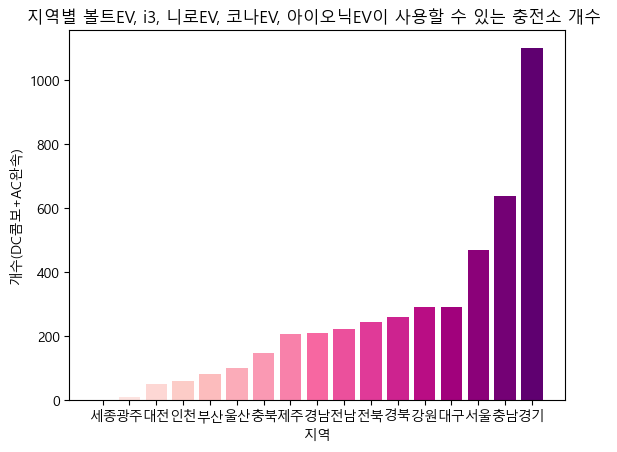

In [527]:
plt.rcParams['font.family'] = 'Malgun Gothic'
x = np.arange(17)
values = df["DC콤보+AC완속"]
label = list(df.index)

colors = sns.color_palette('RdPu',17)
plt.bar(x,values, color = colors)
plt.title("지역별 볼트EV, i3, 니로EV, 코나EV, 아이오닉EV이 사용할 수 있는 충전소 개수 ")
plt.xticks(x,label)
plt.xlabel("지역")
plt.ylabel("개수(DC콤보+AC완속)")

plt.show()

In [534]:
df = charge_area.sort_values(by="DC차데모+AC완속")

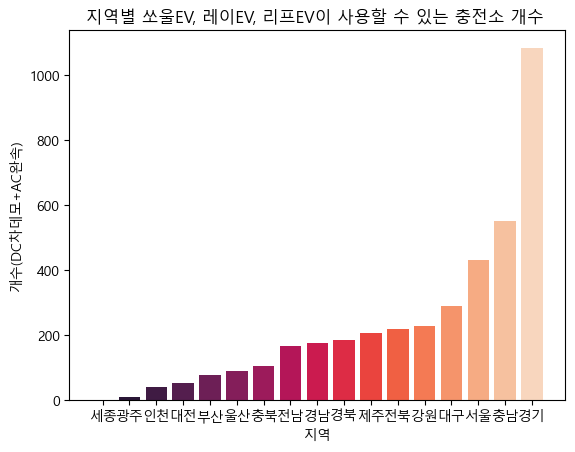

In [535]:
plt.rcParams['font.family'] = 'Malgun Gothic'
x = np.arange(17)
values = df["DC차데모+AC완속"]
label = list(df.index)

colors = sns.color_palette('rocket',17)
plt.bar(x,values, color = colors)
plt.title("지역별 쏘울EV, 레이EV, 리프EV이 사용할 수 있는 충전소 개수 ")
plt.xticks(x,label)
plt.xlabel("지역")
plt.ylabel("개수(DC차데모+AC완속)")

plt.show()

In [536]:
df = charge_area.sort_values(by="AC3상+AC완속")

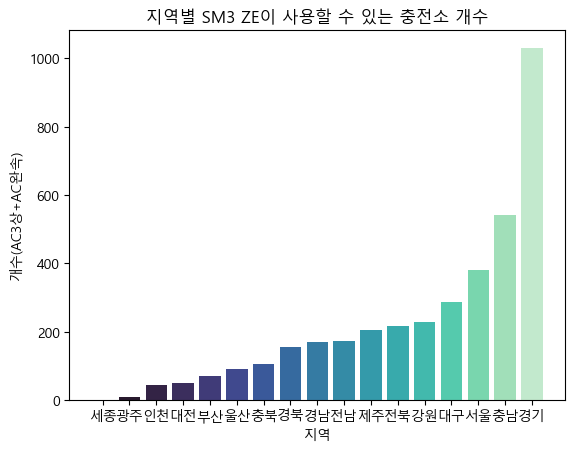

In [537]:
plt.rcParams['font.family'] = 'Malgun Gothic'
x = np.arange(17)
values = df["AC3상+AC완속"]
label = list(df.index)

colors = sns.color_palette('mako',17)
plt.bar(x,values, color = colors)
plt.title("지역별 SM3 ZE이 사용할 수 있는 충전소 개수")
plt.xticks(x,label)
plt.xlabel("지역")
plt.ylabel("개수(AC3상+AC완속)")

plt.show()

In [538]:
df = charge_area.sort_values(by="DC콤보")

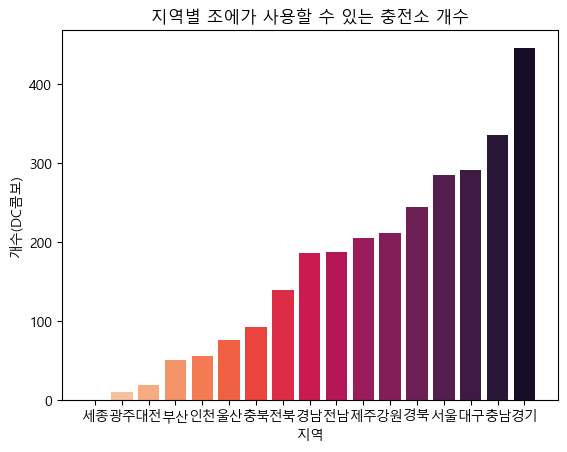

In [539]:
plt.rcParams['font.family'] = 'Malgun Gothic'
x = np.arange(17)
values = df["DC콤보"]
label = list(df.index)

colors = sns.color_palette('rocket_r',17)
plt.bar(x,values, color = colors)
plt.title("지역별 조에가 사용할 수 있는 충전소 개수")
plt.xticks(x,label)
plt.xlabel("지역")
plt.ylabel("개수(DC콤보)")

plt.show()

In [540]:
df = charge_area.sort_values(by="AC완속")

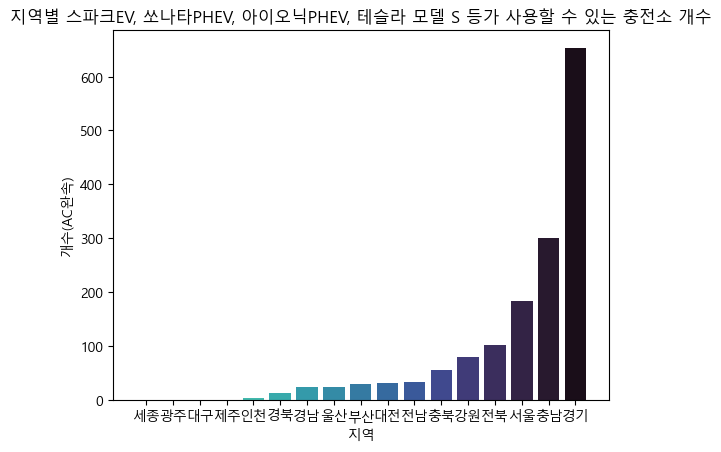

In [541]:
plt.rcParams['font.family'] = 'Malgun Gothic'
x = np.arange(17)
values = df["AC완속"]
label = list(df.index)

colors = sns.color_palette('mako_r',17)
plt.bar(x,values, color = colors)
plt.title("지역별 스파크EV, 쏘나타PHEV, 아이오닉PHEV, 테슬라 모델 S 등가 사용할 수 있는 충전소 개수")
plt.xticks(x,label)
plt.xlabel("지역")
plt.ylabel("개수(AC완속)")

plt.show()